In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


performance_data = pd.read_csv('Student_Performance.csv')


In [3]:
performance_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
performance_data.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [5]:
zero_values = [col for col in performance_data.columns if (performance_data[col] == 0).any()]
print(zero_values)

['Sample Question Papers Practiced']


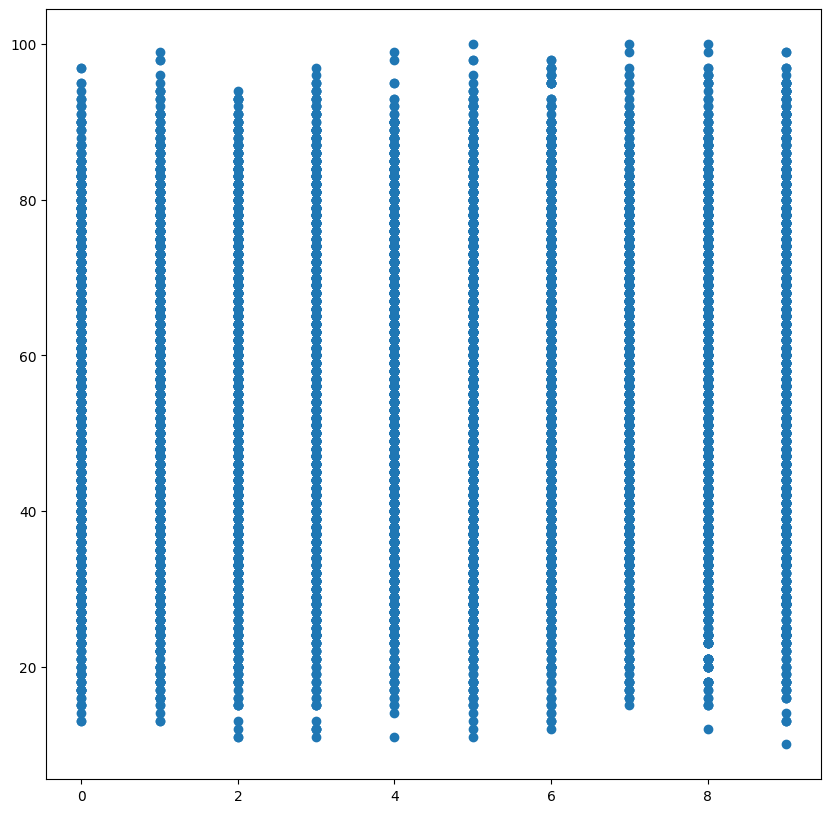

In [6]:
fig = plt.figure(figsize = (10,10))
plt.scatter(performance_data['Sample Question Papers Practiced'], performance_data.iloc[:, -1])

***This is to show if we really have zero values in this column(I have trust issues with myself)***

In [7]:
performance_data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [8]:
performance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [9]:
#Split data into X and y
X = performance_data.iloc[:, :-1]
y = performance_data.iloc[:, -1]


In [10]:
#Split into Categorical and Numerical
categorical = [i for i in X.columns if X[i].dtype == 'object']
numerical = [i for i in X.columns if X[i].dtype == 'int64']

In [11]:
X[categorical]

,Extracurricular Activities
0,Yes
1,No
2,Yes
3,Yes
4,No
...,...
9995,Yes
9996,Yes
9997,Yes
9998,Yes


In [24]:
X[numerical]

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5
...,...,...,...,...
9995,1,49,4,2
9996,7,64,8,5
9997,6,83,8,5
9998,9,97,7,0


***We see that the last column contains 0 values. This zero value is important (Represents the sample questions papers practiced by students) we do not need to impute these values.***

In [25]:
y #We also turned this to int64

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0
...,...
9995,23.0
9996,58.0
9997,74.0
9998,95.0


In [26]:
#Using Column Transfer, apply OneHotEncoding and Standard Scaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

pre_processor = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(drop='first', sparse_output =False), categorical),
        ('num', StandardScaler(), numerical) #Zeroes are meaningful,hence we continue with standardscaler
    ]
)

#Fit transform
X_processed = pre_processor.fit_transform(X)

In [27]:
#Transform also the y value (I forgot)

y_processed = StandardScaler().fit_transform(y.values.reshape(-1,1))

In [28]:
#Transform both X and y Values

X = pd.DataFrame(X_processed, columns = ['Extracurricular Activities',
                                         'Hours Studied', 'Previous Scores',
                                         'Sleep Hours', 'Sample Question Practiced'])

y = pd.DataFrame(y_processed, columns = ['Performance Index'])

In [29]:
X

,Extracurricular Activities,Hours Studied,Previous Scores,Sleep Hours,Sample Question Practiced
0,1.0,0.775188,1.704176,1.456205,-1.249754
1,0.0,-0.383481,0.723913,-1.492294,-0.900982
2,1.0,1.161410,-1.063626,0.276805,-0.900982
3,1.0,0.002742,-1.005963,-0.902594,-0.900982
4,0.0,0.775188,0.320275,0.866505,0.145333
...,...,...,...,...,...
9995,1.0,-1.542149,-1.178951,-1.492294,-0.900982
9996,1.0,0.775188,-0.314013,0.866505,0.145333
9997,1.0,0.388965,0.781575,0.866505,0.145333
9998,1.0,1.547633,1.588851,0.276805,-1.598526


In [30]:
y

,Performance Index
0,1.862167
1,0.508818
2,-0.532220
3,-1.000687
4,0.560870
...,...
9995,-1.677362
9996,0.144454
9997,0.977285
9998,2.070374


In [31]:
#Split into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [32]:
X_train.shape

(7000, 5)

In [33]:
y_train.shape

(7000, 1)

In [34]:
X_test.shape

(3000, 5)

In [35]:
#Train the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)



LinearRegression()

In [36]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

R-squared: 0.9890110607021136
Mean Squared Error: 0.011017946275758663
Mean Absolute Error: 0.08375377351742863


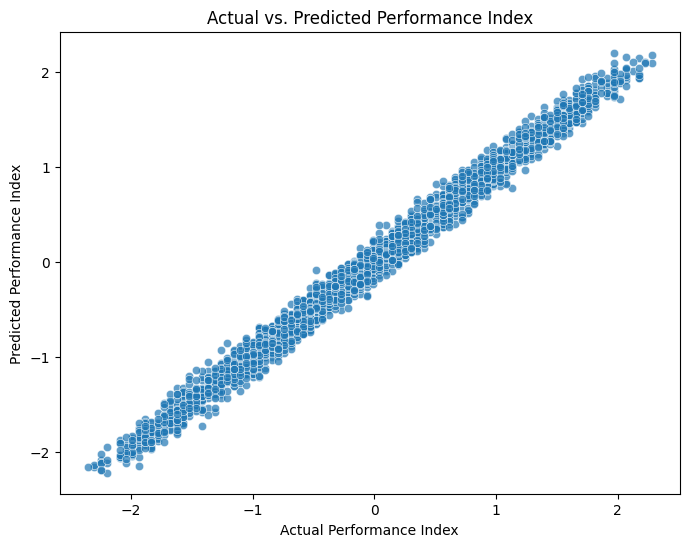

In [37]:
import seaborn as sns

# Create a scatter plot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test['Performance Index'], y=y_pred.flatten(), alpha=0.7)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs. Predicted Performance Index")
plt.show()


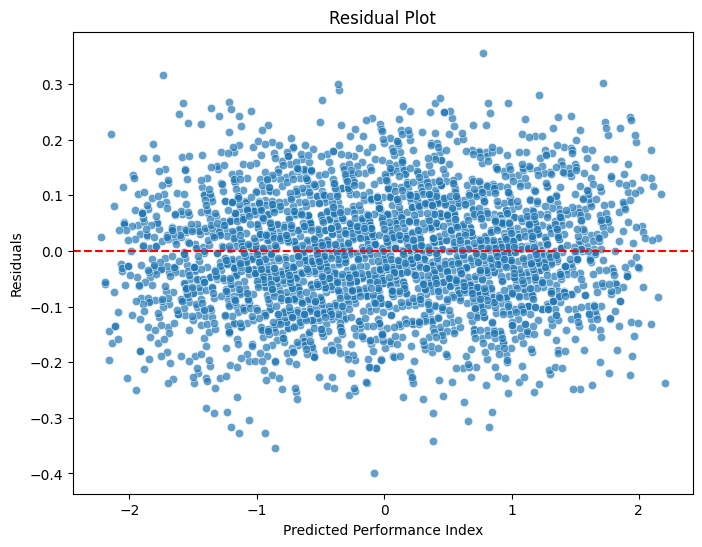

In [38]:
# Create a residual plot with Seaborn
residuals = y_test['Performance Index'] - y_pred.flatten()
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred.flatten(), y=residuals, alpha=0.7)
plt.xlabel("Predicted Performance Index")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

***We could interpret from the metrics acquired that our model is well fitted. In r2, our model has a variance of 0.98 which indicates that all variance are explained well into the model. Our MSE value, is 0.01 which explains how close our values are, which also means that there are less errors in our data. Lastly our MAE is also low which indicates that the model predictions are only 0.084 units away from the actual values.***

# Feature Selection using SelectKBest

In [39]:
#We take the data again and pre process it
performance_data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [40]:
#Split into X and y
X2 = performance_data.iloc[:, :-1]
y2 = performance_data.iloc[:, -1]

In [41]:
X2.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5


In [42]:
y2.head()

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0


In [43]:
categorical2 = [i for i in X2.columns if X2[i].dtype == 'object']
numerical2 = [i for i in X2.columns if X2[i].dtype == 'int64']

In [44]:
X2[categorical2]

,Extracurricular Activities
0,Yes
1,No
2,Yes
3,Yes
4,No
...,...
9995,Yes
9996,Yes
9997,Yes
9998,Yes


In [45]:
X2[numerical2]

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5
...,...,...,...,...
9995,1,49,4,2
9996,7,64,8,5
9997,6,83,8,5
9998,9,97,7,0


In [46]:
#Convert the target value to int
y2 = y2.astype(int)
y2.dtype

dtype('int64')

In [47]:
#We scale first the y variable
y2_processed = StandardScaler().fit_transform(y2.values.reshape(-1,1))

In [51]:
#We scale the other features

pre_processor2 = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(drop='first', sparse_output= False), categorical2),
        ('num', StandardScaler(), numerical2)
    ]
)

X2_processed = pre_processor2.fit_transform(X2)

In [50]:
y2_processed

array([[ 1.86216688],
       [ 0.50881766],
       [-0.5322202 ],
       ...,
       [ 0.9772847 ],
       [ 2.07037446],
       [ 0.45676577]])

In [52]:
X2_processed

array([[ 1.        ,  0.77518771,  1.70417565,  1.45620461, -1.24975394],
       [ 0.        , -0.38348058,  0.72391268, -1.49229423, -0.90098215],
       [ 1.        ,  1.16141048, -1.06362569,  0.27680507, -0.90098215],
       ...,
       [ 1.        ,  0.38896495,  0.7815752 ,  0.86650484,  0.1453332 ],
       [ 1.        ,  1.54763324,  1.5888506 ,  0.27680507, -1.59852572],
       [ 0.        ,  0.77518771,  0.26261245,  0.86650484, -1.24975394]])

In [72]:
#Turn into a dataframe
X2 = pd.DataFrame(X2_processed, columns = ['Extracurricular Activities',
                                         'Hours Studied', 'Previous Scores',
                                         'Sleep Hours', 'Sample Question Practiced'])
y2 = pd.DataFrame(y2_processed, columns = ['Performance Index'])

In [73]:
X2.head()

,Extracurricular Activities,Hours Studied,Previous Scores,Sleep Hours,Sample Question Practiced
0,1.0,0.775188,1.704176,1.456205,-1.249754
1,0.0,-0.383481,0.723913,-1.492294,-0.900982
2,1.0,1.161410,-1.063626,0.276805,-0.900982
3,1.0,0.002742,-1.005963,-0.902594,-0.900982
4,0.0,0.775188,0.320275,0.866505,0.145333


In [56]:
y2.head()

,Performance Index
0,1.862167
1,0.508818
2,-0.532220
3,-1.000687
4,0.560870


In [57]:
#Split the data into train and test

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.3, random_state = 42)


In [67]:
#Using pipleline, select the best features and use linear regression

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression


pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func = f_regression, k =3)), #k=3 we select the top 3 columns
    ('model', LinearRegression())
])

pipeline.fit(X2_train,y2_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('feature_selection',
                 SelectKBest(k=3,
                             score_func=<function f_regression at 0x7a3a0aad6560>)),
                ('model', LinearRegression())])

In [68]:
#Predict results
y2_pred = pipeline.predict(X2_test)

In [69]:
#Check r2, MSE, MAE (this is with feature selection)

print(f"r squared score: {r2_score(y2_pred, y2_test)}")
print(f"mean squared error: {mean_squared_error(y2_pred, y2_test)}")
print(f"mean absolute error: {mean_absolute_error(y2_pred, y2_test)}")



r squared score: 0.987407574679504
mean squared error: 0.012292842446909901
mean absolute error: 0.08853425519480959


In [63]:
#For reference this is without feature selection

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

R-squared: 0.9890110607021136
Mean Squared Error: 0.011017946275758663
Mean Absolute Error: 0.08375377351742863


In [70]:
# prompt: can you generate a new x_test that I will use for testing my models ability?

# Generate new data for testing
num_new_samples = 20  # You can change this to the desired number of samples

# Sample from the existing data distribution (you can adjust this)
new_X_test = X.sample(n=num_new_samples, random_state=42)
new_y_test = y.sample(n=num_new_samples, random_state=42)


# You can also generate completely new data based on your understanding of the features
# For example:
# new_X_test = pd.DataFrame({
#     'Extracurricular Activities': np.random.randint(0, 2, num_new_samples),
#     'Hours Studied': np.random.randint(1, 10, num_new_samples),
#     'Previous Scores': np.random.randint(60, 100, num_new_samples),
#     'Sleep Hours': np.random.randint(6, 10, num_new_samples),
#     'Sample Question Practiced': np.random.randint(0, 10, num_new_samples)
# })
# You'll need to scale and transform 'new_X_test' using your preprocessor
# new_X_test = pd.DataFrame(pre_processor.transform(new_X_test), columns=['Extracurricular Activities',
#                                                                      'Hours Studied', 'Previous Scores',
#                                                                      'Sleep Hours', 'Sample Question Practiced'])

# Now you can use 'new_X_test' to predict and evaluate your model's performance
y_pred_new = model.predict(new_X_test)

# Calculate metrics for the new data
r2_new = r2_score(new_y_test, y_pred_new)
mse_new = mean_squared_error(new_y_test, y_pred_new)
mae_new = mean_absolute_error(new_y_test, y_pred_new)

print(f"R-squared (new data): {r2_new}")
print(f"Mean Squared Error (new data): {mse_new}")
print(f"Mean Absolute Error (new data): {mae_new}")


R-squared (new data): 0.9724131694575245
Mean Squared Error (new data): 0.02114855629918407
Mean Absolute Error (new data): 0.12179309742750204
